In [46]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

from matplotlib import pyplot
import numpy
import seaborn

%matplotlib inline

In [2]:
_groups = fetch_20newsgroups()

In [3]:
type(_groups)

sklearn.datasets.base.Bunch

In [4]:
_groups.keys()

dict_keys(['target', 'description', 'DESCR', 'filenames', 'data', 'target_names'])

In [5]:
_groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [10]:
# The target key corresponds to a newsgroup but is encoded as an integer.
# They range from 0 to 19, representing 20 topics.
numpy.unique(_groups['target'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [16]:
# first document, it's topic number, and name
type(_groups.data)

list

In [19]:
_groups.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [23]:
print(_groups.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [20]:
_groups['target'][0]

7

In [22]:
_groups['target_names'][_groups['target'][0]]

'rec.autos'

In [24]:
len(_groups.data[0])

721

In [26]:
len(_groups.data[1])

858

In [28]:
# - bag of words model: View a text as a bag of words

# - In the context of multiple topics or categories, it is important to know what the distribution of topics is. 
# A uniform class distribution is the easiest to deal with because there are no under-represented or 
# over-represented categories. 
# However, we frequently have a skewed distribution with one or more categories dominating.

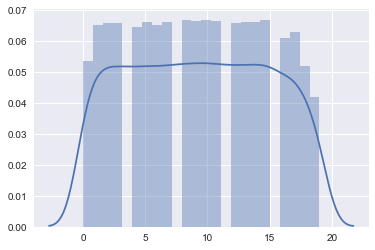

In [32]:
seaborn.distplot(_groups.target)

# distribution seems to be uniform

In [44]:
# - Histogram of the 500 highest word counts

# - We have two basic strategies to deal words from the same root:
# 1. Stemming - It involves chopping, if necessary, off letters, for example, 'words' becomes 'word' after stemming. 
#    The result of stemming doesn't have to be a valid word. 
# 2. Lemmatizing - It is slower but more accurate. It performs a dictionary lookup and guarantees to return a valid 
#    word unless we start with a non-valid word.

In [48]:
# return only alphabet words, filter out non-alphabet words
def letters_only(astr):
    return astr.isalpha()

In [35]:
_cv = CountVectorizer(stop_words='english', max_features=500)

In [49]:
_cleaned = []

In [50]:
_all_names = set(names.words())

In [51]:
_lemmatizer = WordNetLemmatizer()

In [ ]:
for _post in _groups.data:
    _cleaned.append(' '.join([_lemmatizer.lemmatize(_word.lower() for _word in _post if )]))

In [40]:
_transformed = _cv.fit_transform(_groups.data)
type(_transformed)

scipy.sparse.csr.csr_matrix

In [39]:
print(_cv.get_feature_names())

['00', '000', '0d', '0t', '10', '100', '11', '12', '13', '14', '145', '15', '16', '17', '18', '19', '1993', '1d9', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '34u', '35', '40', '45', '50', '55', '80', '92', '93', '__', '___', 'a86', 'able', 'ac', 'access', 'actually', 'address', 'ago', 'agree', 'al', 'american', 'andrew', 'answer', 'anybody', 'apple', 'application', 'apr', 'april', 'area', 'argument', 'armenian', 'armenians', 'article', 'ask', 'asked', 'att', 'au', 'available', 'away', 'ax', 'b8f', 'bad', 'based', 'believe', 'berkeley', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'buy', 'ca', 'california', 'called', 'came', 'canada', 'car', 'card', 'care', 'case', 'cause', 'cc', 'center', 'certain', 'certainly', 'change', 'check', 'children', 'chip', 'christ', 'christian', 'christians', 'church', 'city', 'claim', 'clinton', 'clipper', 'cmu', 'code', 'college', 'color', 'colorado', 'columbia', '

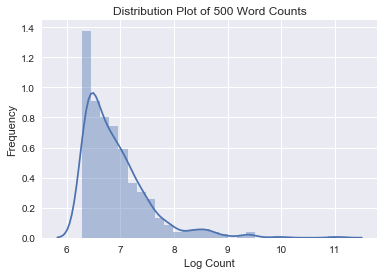

In [38]:
pyplot.xlabel('Log Count')
pyplot.ylabel('Frequency')
pyplot.title('Distribution Plot of 500 Word Counts')
seaborn.distplot(numpy.log(_transformed.toarray().sum(axis=0)))

[[0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
